Gaussian-SVM-Cross 
(classifying 2D points, allowing for them to be linearly separable in higher dimension)

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC


Plotting the points in 2D space

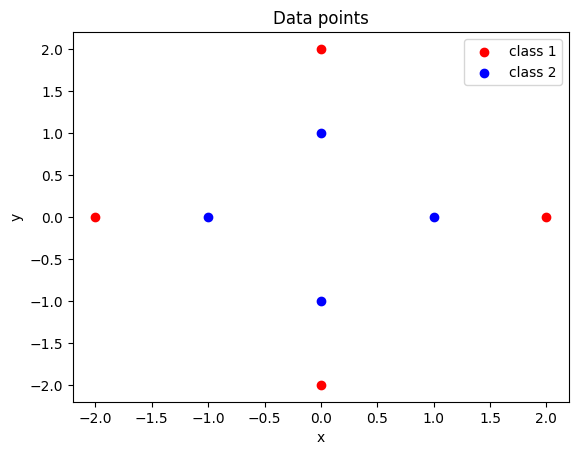

In [15]:

all_data = np.array([[-2, 0], [0, 2], [0, -2], [2, 0], [-1, 0], [1, 0], [0, 1], [0, -1]])

# plot these points in 2D
x_coord_class1 = all_data[0:4, 0]
y_coord_class1 = all_data[0:4, 1]
x_coord_class2 = all_data[4:8, 0]
y_coord_class2 = all_data[4:8, 1]

plt.scatter(x_coord_class1, y_coord_class1, color='red', label='class 1')
plt.scatter(x_coord_class2, y_coord_class2, color='blue', label='class 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points')
plt.legend(loc='upper right')
plt.show()




